# Importing the required libraries


In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# Loading and exploring the data


In [2]:
books=pd.read_excel('C:\\Users\\User\\Desktop\\Chelsea_Squad(Season21-22).xlsx')
books.head()


,Mendy,Kepa,Azpilicueta,Rudiger,Silva,Chritensen,Kante,Pulisic,Mount,Jorginho,...,Havertz,Loftus-Cheek,Zouma,Giroud,Abraham,Simons,Vale,Emerson,Bell,W/L
0,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
3,1,0,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
books.shape

(40, 32)

In [4]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Mendy         40 non-null     int64
 1   Kepa          40 non-null     int64
 2   Azpilicueta   40 non-null     int64
 3   Rudiger       40 non-null     int64
 4   Silva         40 non-null     int64
 5   Chritensen    40 non-null     int64
 6   Kante         40 non-null     int64
 7   Pulisic       40 non-null     int64
 8   Mount         40 non-null     int64
 9   Jorginho      40 non-null     int64
 10  Kovacic       40 non-null     int64
 11  Alonso        40 non-null     int64
 12  James         40 non-null     int64
 13  Chilwell      40 non-null     int64
 14  Chalobah      40 non-null     int64
 15  Odoi          40 non-null     int64
 16  Ziyech        40 non-null     int64
 17  Lukaku        40 non-null     int64
 18  Sarr          40 non-null     int64
 19  Werner        40 non-null     i

# Apriori Algorithm
# Associations Rule with 0.10% support and 0.70% confidence interval

In [5]:
frequent_itemsets = apriori(books,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.675,(Mendy)
1,0.300,(Kepa)
2,0.675,(Azpilicueta)
3,0.850,(Rudiger)
4,0.575,(Silva)
...,...,...
4937,0.100,"(W/L, Azpilicueta, Rudiger, Sarr, Lukaku, Jorg..."
4938,0.100,"(Alonso, W/L, Azpilicueta, Kovacic, Chritensen..."
4939,0.125,"(W/L, Azpilicueta, Kovacic, Chritensen, Rudige..."
4940,0.100,"(Alonso, Azpilicueta, Kovacic, Chritensen, Rud..."


In [6]:
rules=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)


In [7]:
rules[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Mendy),(Rudiger),0.675,0.850,0.650,0.962963,1.132898,0.076250,4.050000
3,(Rudiger),(Mendy),0.850,0.675,0.650,0.764706,1.132898,0.076250,1.381250
4,(Mendy),(Silva),0.675,0.575,0.450,0.666667,1.159420,0.061875,1.275000
5,(Silva),(Mendy),0.575,0.675,0.450,0.782609,1.159420,0.061875,1.495000
6,(Mendy),(Chritensen),0.675,0.525,0.375,0.555556,1.058201,0.020625,1.068750
...,...,...,...,...,...,...,...,...,...
125827,(Kovacic),"(Alonso, W/L, Azpilicueta, Chritensen, Rudiger...",0.550,0.100,0.100,0.181818,1.818182,0.045000,1.100000
125828,(Chritensen),"(Alonso, W/L, Azpilicueta, Kovacic, Rudiger, L...",0.525,0.100,0.100,0.190476,1.904762,0.047500,1.111765
125829,(Rudiger),"(Alonso, W/L, Azpilicueta, Kovacic, Chritensen...",0.850,0.100,0.100,0.117647,1.176471,0.015000,1.020000
125830,(Lukaku),"(Alonso, W/L, Azpilicueta, Kovacic, Chritensen...",0.525,0.125,0.100,0.190476,1.523810,0.034375,1.080882


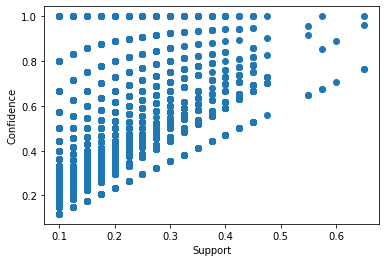

In [8]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [9]:
frequent_itemsets.sort_values('support',ascending=False).head(20)

,support,itemsets
3,0.850,(Rudiger)
0,0.675,(Mendy)
2,0.675,(Azpilicueta)
24,0.675,(W/L)
85,0.650,"(Rudiger, Jorginho)"
26,0.650,"(Mendy, Rudiger)"
9,0.650,(Jorginho)
60,0.600,"(Rudiger, Azpilicueta)"
11,0.600,(Alonso)
4,0.575,(Silva)


In [15]:
frequent_itemsets = apriori(books,min_support=0.5,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.675,(Mendy)
1,0.675,(Azpilicueta)
2,0.850,(Rudiger)
3,0.575,(Silva)
4,0.525,(Chritensen)
5,0.575,(Mount)
6,0.650,(Jorginho)
7,0.550,(Kovacic)
8,0.600,(Alonso)
9,0.500,(Odoi)


In [16]:
rules1=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)


In [17]:
rules1[rules1.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Rudiger),(Mendy),0.850,0.675,0.650,0.764706,1.132898,0.07625,1.381250
1,(Mendy),(Rudiger),0.675,0.850,0.650,0.962963,1.132898,0.07625,4.050000
2,(Azpilicueta),(Rudiger),0.675,0.850,0.600,0.888889,1.045752,0.02625,1.350000
3,(Rudiger),(Azpilicueta),0.850,0.675,0.600,0.705882,1.045752,0.02625,1.105000
4,(Rudiger),(Silva),0.850,0.575,0.575,0.676471,1.176471,0.08625,1.313636
5,(Silva),(Rudiger),0.575,0.850,0.575,1.000000,1.176471,0.08625,inf
6,(Rudiger),(Mount),0.850,0.575,0.550,0.647059,1.125320,0.06125,1.204167
7,(Mount),(Rudiger),0.575,0.850,0.550,0.956522,1.125320,0.06125,3.450000
8,(Rudiger),(Jorginho),0.850,0.650,0.650,0.764706,1.176471,0.09750,1.487500
9,(Jorginho),(Rudiger),0.650,0.850,0.650,1.000000,1.176471,0.09750,inf


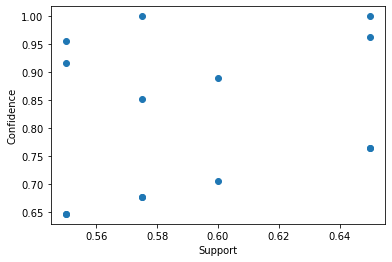

In [18]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [19]:
frequent_itemsets = apriori(books,min_support=0.10609,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.675,(Mendy)
1,0.300,(Kepa)
2,0.675,(Azpilicueta)
3,0.850,(Rudiger)
4,0.575,(Silva)
...,...,...
2649,0.125,"(Azpilicueta, Rudiger, Havertz, Alonso, Jorgin..."
2650,0.150,"(Azpilicueta, Rudiger, Kovacic, Mount, Jorginh..."
2651,0.125,"(Azpilicueta, Kovacic, Mount, Jorginho, Chrite..."
2652,0.125,"(Rudiger, Kovacic, Mount, Jorginho, Chritensen..."


In [20]:
rules2=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.4)
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Rudiger),(Mendy),0.850,0.675,0.650,0.764706,1.132898,0.076250,1.381250
3,(Mendy),(Rudiger),0.675,0.850,0.650,0.962963,1.132898,0.076250,4.050000
4,(Mendy),(Silva),0.675,0.575,0.450,0.666667,1.159420,0.061875,1.275000
5,(Silva),(Mendy),0.575,0.675,0.450,0.782609,1.159420,0.061875,1.495000
6,(Chritensen),(Mendy),0.525,0.675,0.375,0.714286,1.058201,0.020625,1.137500
...,...,...,...,...,...,...,...,...,...
49291,(Mount),"(Azpilicueta, Rudiger, Kovacic, Jorginho, Chri...",0.575,0.150,0.125,0.217391,1.449275,0.038750,1.086111
49292,(Jorginho),"(Azpilicueta, Rudiger, Kovacic, Mount, Chriten...",0.650,0.150,0.125,0.192308,1.282051,0.027500,1.052381
49293,(Chritensen),"(Azpilicueta, Rudiger, Kovacic, Mount, Jorginh...",0.525,0.150,0.125,0.238095,1.587302,0.046250,1.115625
49294,(Lukaku),"(Azpilicueta, Rudiger, Kovacic, Mount, Jorginh...",0.525,0.150,0.125,0.238095,1.587302,0.046250,1.115625


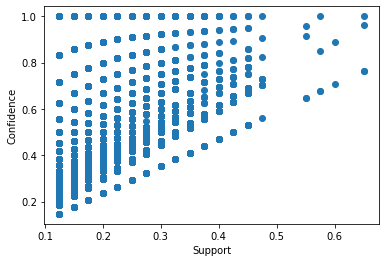

In [21]:
import matplotlib.pyplot as plt
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()